# DSE5002 - Module 5, Project 1

Student: J. Casey Brookshier,
4/15/25,
Created 2/11/2025

# Project Instructions
"""
Created on Wed Apr  2 10:32:25 2025
Project Mission statement: Utilize rdataproject.csv and answer the following 
from the following assignment instructions - Your CEO has decided that the company 
needs a full-time data scientist, and possibly a team of them in the future. 
She thinks she needs someone who can help drive data science within then entire 
organization and could potentially lead a team in the future. She understands that 
data scientist salaries vary widely across the world and is unsure what to pay them. 
To complicate matters, salaries are going up due to the great recession and the 
market is highly competitive. Your CEO has asked you to prepare an analysis on 
data science salaries and provide them with a range to be competitive and 
get top talent. The position can work offshore, but the CEO would like to know 
what the difference is for a person working in the United States. Your company is 
currently a small company but is expanding rapidly. 

Prepare your analysis in an R file. Your final product should be a power point 
presentation giving your recommendation to the CEO. CEOs do not care about your 
code and don’t want to see it. They want to see visuals and a well 
thought out analysis. You will need to turn in the power point and the code
as a flat R file. (Updated instructions dictate that code analysis should be done in 
                   Python per J.Lowhorn)

@author: caseybrookshier
"""

## I. Problem Definition (Introduction)
 #### Questions to consider:
 #### 1. What was the interquartile salary range of Senior/Lead data scientists by year?
 #### 2. What is the rate of salary increase by year?
 #### 3. What is the salary difference between a US vs. non-US data scientist
 #### 4. Which candidate will offer the greatest bang/buck?
 
## II. How Problem was solved (Analysis)
 #### 1. To find the IQR salary for senior and lead data scientists, aggregate Data Scientist column by the cells which include the       word lead/senior. Create 2 boxplots for this set, one US, one non-US
 #### 2. Separate initial lead dataset by year and create boxplot.  Calculate percent increase by year & projection to 2025.
 #### 3. Create 2 boxplots for lead set, one US, one non-US, summarize differences with code. 
 
## III. Conclusion (Recommendation)
 #### 4. Concise clear verbal summary based upon abovementioned data & boxplots
 
 ## Project 1 has 2 deliverables -> 
 ####  a. 3-5 pg Powerpoint
 ####  b. PDF of Jupyter notebook with code


# Herefollows an Analysis of the given data set, a more CURRENT data set is analyzed at the end.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os

# check on the current working directory
#change directory for use of relative paths 
os.chdir('/Users/caseybrookshier/Desktop/Merrimack/DSE5002/Project_1') 
os.getcwd()

proj1_salary= pd.read_csv("r project data-1.csv") 
print(proj1_salary.head())

   Unnamed: 0  work_year experience_level employment_type  \
0           0       2020               MI              FT   
1           1       2020               SE              FT   
2           2       2020               SE              FT   
3           3       2020               MI              FT   
4           4       2020               SE              FT   

                    job_title  salary salary_currency  salary_in_usd  \
0              Data Scientist   70000             EUR          79833   
1  Machine Learning Scientist  260000             USD         260000   
2           Big Data Engineer   85000             GBP         109024   
3        Product Data Analyst   20000             USD          20000   
4   Machine Learning Engineer  150000             USD         150000   

  employee_residence  remote_ratio company_location company_size  
0                 DE             0               DE            L  
1                 JP             0               JP            S  

In [3]:
# aggregate Data Scientist job_title column by the rows in which include the word lead is present. 
# Create 2 boxplots for this set, one US, one non-US
# Check if 'lead' is in the 'job_title' column
#Filter out EN & EX from experience_level as data too LIMITED to created useful boxplot (discovered by experiment)
proj1_salary_lead = proj1_salary[proj1_salary['job_title'].str.contains('lead', case=False, na=False) & proj1_salary['experience_level'].isin(['SE','MI'])]
proj1_salary_lead_US = proj1_salary_lead[proj1_salary_lead['company_location'].str.contains('US',case=False, na=False)]
proj1_salary_lead_nonUS = proj1_salary_lead[~proj1_salary_lead['company_location'].str.contains('US',case=True, na=False)]

# Display the 1st filtered result first five rows
print(proj1_salary_lead[:5])

# Get summary statistics 'lead' filtered, US, nonUS results
print(proj1_salary_lead.describe())
print(proj1_salary_lead_US.describe())
print(proj1_salary_lead_nonUS.describe())

    Unnamed: 0  work_year experience_level employment_type  \
6            6       2020               SE              FT   
9            9       2020               SE              FT   
13          13       2020               MI              FT   
19          19       2020               MI              FT   
24          24       2020               MI              FT   

              job_title  salary salary_currency  salary_in_usd  \
6   Lead Data Scientist  190000             USD         190000   
9    Lead Data Engineer  125000             USD         125000   
13    Lead Data Analyst   87000             USD          87000   
19   Lead Data Engineer   56000             USD          56000   
24  Lead Data Scientist  115000             USD         115000   

   employee_residence  remote_ratio company_location company_size  
6                  US           100               US            S  
9                  NZ            50               NZ            S  
13                 US     

The interquartile range (IQR) of lead data scientist salaries for those with experience levels middle to senior is 87,000-170,000 USD. The IQR for comparable US an non-US populations is approximately 123,000-233,000 USD and 52,000-112,000 USD, respectively.

IQR lead DS salaries ALL = 87,000-170,000 USD.
IQR lead DS salaries US = 123,000-233,000 USD.
IQR lead DS salaries non-US = 52,000-112,000 USD.

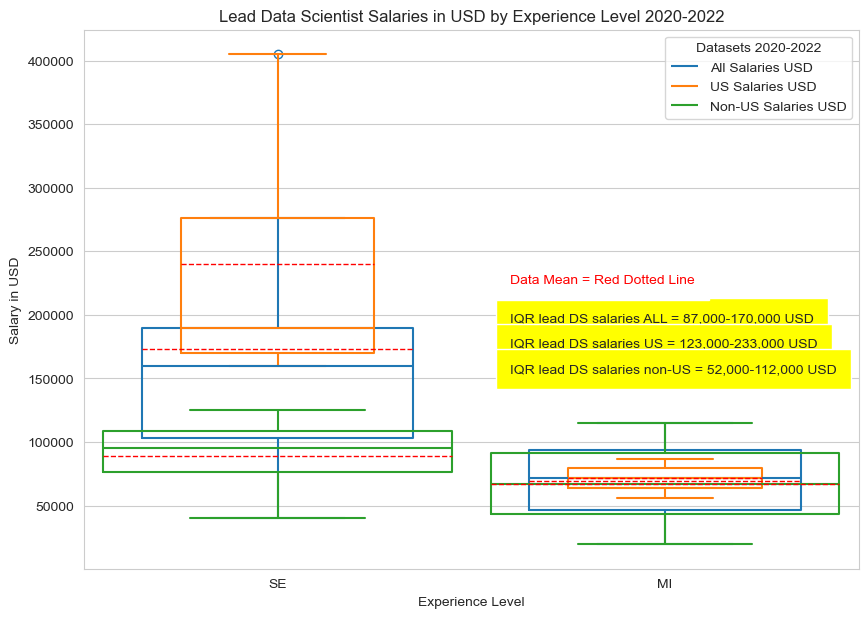

In [4]:

# Create a boxplot representing the salary_in_usd for the filtered data by experience level
# Create 3 plots, showing subsets created above, superimposed for comparison
sns.set_style("whitegrid")
plt.figure(figsize=(10,7))
sns.boxplot(proj1_salary_lead,x='experience_level',y="salary_in_usd", orient="v",fill=False, width=.7, showmeans=True, meanline=True, meanprops={"linewidth": 1, "color": "red"},label='All Salaries USD').set(title="Lead Data Scientist Salaries in USD by Experience Level 2020-2022")
sns.boxplot(proj1_salary_lead_US,x='experience_level',y="salary_in_usd", orient="v",fill=False, showmeans=True, meanline=True, meanprops={"linewidth": 1, "color": "red"}, width=.5,label='US Salaries USD').set(title="Lead Data Scientist Salaries in USD by Experience Level 2020-2022")
sns.boxplot(proj1_salary_lead_nonUS,x='experience_level',y="salary_in_usd", orient="v",fill=False, width=.9,showmeans=True, meanline=True, meanprops={"linewidth": 1, "color": "red"},label='Non-US Salaries USD').set(title="Lead Data Scientist Salaries in USD by Experience Level 2020-2022")

#Adding Textbox
plt.text(0.6, 195000, 'IQR lead DS salaries ALL = 87,000-170,000 USD', fontsize=10, bbox={'facecolor': 'yellow', 'pad': 10, 'alpha': 1})
plt.text(0.6, 175000, 'IQR lead DS salaries US = 123,000-233,000 USD', fontsize=10, bbox={'facecolor': 'yellow', 'pad': 10, 'alpha': 1})
plt.text(0.6, 155000, 'IQR lead DS salaries non-US = 52,000-112,000 USD', fontsize=10, bbox={'facecolor': 'yellow', 'pad': 10, 'alpha': 1})
plt.text(0.6, 225000, 'Data Mean = Red Dotted Line',color='red', fontsize=10, bbox={'facecolor': 'white', 'pad': 10, 'alpha': 1})

# Set axis labels using plt.xlabel() and plt.ylabel()
plt.xlabel('Experience Level')
plt.ylabel('Salary in USD')

# Adding legend
plt.legend(title='Datasets 2020-2022')
plt.show()

# The following boxplots were created out of curiosity, and to consider different ways in which to analyze the data.

In [5]:
# Create a boxplot representing the salary_in_usd for the filtered data by year
# Code canceled as 2025 boxplot more informative
'''plt.figure(figsize=(10, 10))
sns.boxplot(proj1_salary_lead,x='work_year',y="salary_in_usd", orient="v").set(title="Lead Salaries in USD by Year")'''

'plt.figure(figsize=(10, 10))\nsns.boxplot(proj1_salary_lead,x=\'work_year\',y="salary_in_usd", orient="v").set(title="Lead Salaries in USD by Year")'

[Text(0.5, 1.0, 'Lead Salaries in USD by Location')]

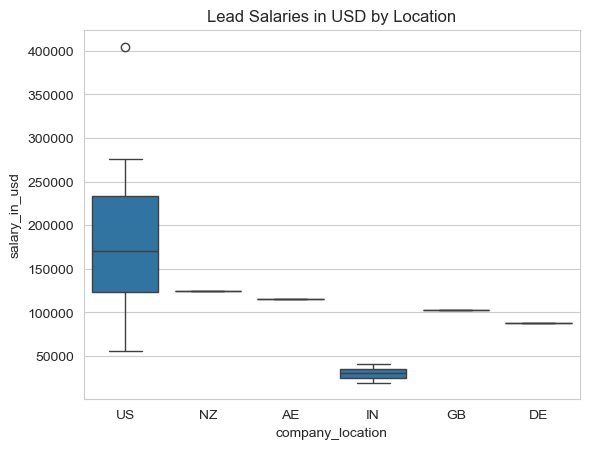

In [6]:
# Create a boxplot representing the salary_in_usd for the filtered data by company location
sns.boxplot(proj1_salary_lead,x='company_location',y="salary_in_usd", orient="v").set(title="Lead Salaries in USD by Location")

[Text(0.5, 1.0, 'Lead Salaries in USD by Remote Ratio')]

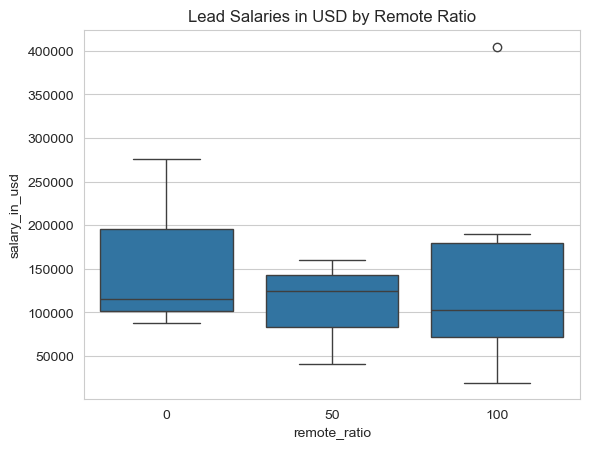

In [7]:
# Create a boxplot representing the salary_in_usd for the filtered data by remote status
sns.boxplot(proj1_salary_lead,x='remote_ratio',y="salary_in_usd", orient="v").set(title="Lead Salaries in USD by Remote Ratio")

[Text(0.5, 1.0, 'Salary by Lead Experience Level')]

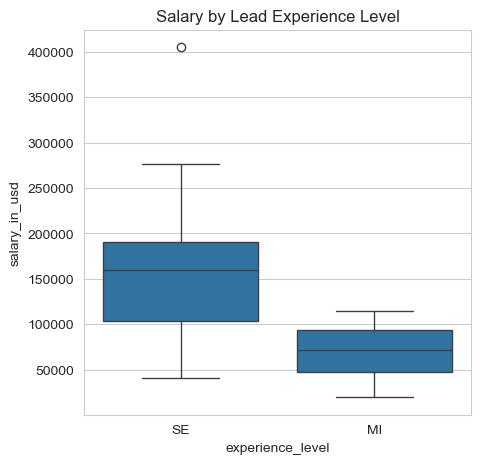

In [8]:
#create a boxplot that shows Salary by 'Lead' Experience Level. 
plt.figure(figsize=(5, 5))
sns.boxplot(proj1_salary_lead,x='experience_level',y="salary_in_usd", orient="v").set(title="Salary by Lead Experience Level")

# In the interest of going the extra mile, a more current data set was obtained from Kaggle. 
#### Kaggle is reputed to offer numerous accurate datasets for data science and machine learning enthusiasts.

In [9]:
#Download 2025 dataset from Kaggle for up-to-date comparison to original set. 
os.chdir('/Users/caseybrookshier/Desktop/Merrimack/DSE5002/Project_1/DSE5002_project1') 
os.getcwd()

proj1_20to25_salary= pd.read_csv("DataScience_salaries_2025.csv") 
print(proj1_20to25_salary.head())


   work_year experience_level employment_type           job_title  salary  \
0       2025               MI              FT  Research Scientist  208000   
1       2025               MI              FT  Research Scientist  147000   
2       2025               SE              FT  Research Scientist  173000   
3       2025               SE              FT  Research Scientist  117000   
4       2025               MI              FT         AI Engineer  100000   

  salary_currency  salary_in_usd employee_residence  remote_ratio  \
0             USD         208000                 US             0   
1             USD         147000                 US             0   
2             USD         173000                 US             0   
3             USD         117000                 US             0   
4             USD         100000                 US           100   

  company_location company_size  
0               US            M  
1               US            M  
2               US  

In [10]:
# aggregate Data Scientist job_title column by the rows in which include the word lead is present. 
# Create 2 boxplots for this set, one US, one non-US
# Check if 'lead' or 'senior' is in the 'job_title' column
proj1_20to25_lead = proj1_20to25_salary[proj1_20to25_salary['job_title'].str.contains('lead', case=False, na=False)]
proj1_20to25_lead_US = proj1_20to25_lead[proj1_20to25_lead['company_location'].str.contains('US',case=False, na=False)]
proj1_20to25_lead_nonUS = proj1_20to25_lead[~proj1_20to25_lead['company_location'].str.contains('US',case=True, na=False)]

# Display the 1st filtered result first five rows
print(proj1_20to25_lead[:5])

# Get summary statistics LEAD-filtered, US, & nonUS results
print(proj1_20to25_lead.describe())
print(proj1_20to25_lead_US.describe())
print(proj1_20to25_lead_nonUS.describe())

     work_year experience_level employment_type             job_title  salary  \
142       2025               SE              FT  Data Governance Lead  229500   
143       2025               SE              FT  Data Governance Lead  123500   
344       2025               SE              FT  Data Management Lead  147000   
345       2025               SE              FT  Data Management Lead  106900   
510       2025               SE              FT             Data Lead   99816   

    salary_currency  salary_in_usd employee_residence  remote_ratio  \
142             USD         229500                 US             0   
143             USD         123500                 US             0   
344             USD         147000                 US           100   
345             USD         106900                 US           100   
510             USD          99816                 US             0   

    company_location company_size  
142               US            M  
143           

[Text(0.5, 1.0, 'Lead Salaries in USD by Year')]

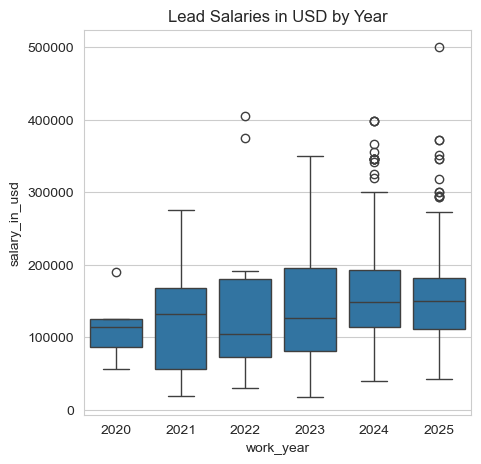

In [11]:
#Calculate Lead Salaries in USD by year
plt.figure(figsize=(5,5))
sns.boxplot(proj1_20to25_lead,x='work_year',y="salary_in_usd", orient="v").set(title="Lead Salaries in USD by Year")

[Text(0.5, 1.0, 'Lead Salaries in USD by Location')]

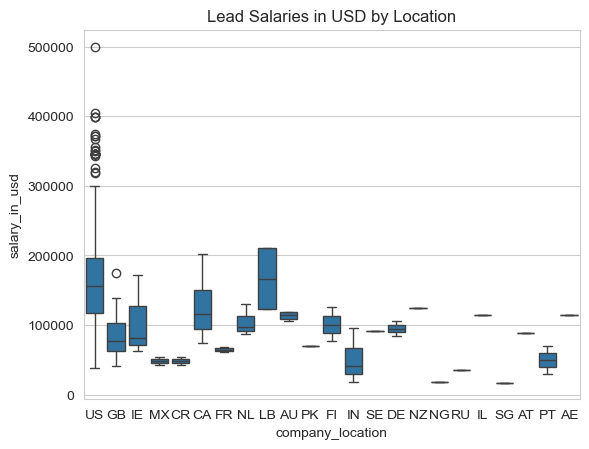

In [12]:
# Create a boxplot representing the salary_in_usd for the filtered data by company location
# Though not especially useful - this shows visually shows the clear advantage the US has over most countries. 
sns.boxplot(proj1_20to25_lead,x='company_location',y="salary_in_usd", orient="v").set(title="Lead Salaries in USD by Location")

In [13]:
# As with original data set, create similar filters for lead, US, and nonUS subsets for 2025
proj1_2025_lead = proj1_20to25_lead[proj1_20to25_lead['work_year']==2025]
proj1_2025_lead_US = proj1_2025_lead[proj1_2025_lead['company_location'].str.contains('US',case=False, na=False)]
proj1_2025_lead_nonUS = proj1_2025_lead[~proj1_2025_lead['company_location'].str.contains('US',case=True, na=False)]

# Display the 1st filtered result first five rows
print(proj1_2025_lead[:5])
print(proj1_2025_lead.describe())
print(proj1_2025_lead_US.describe())
print(proj1_2025_lead_nonUS.describe())

     work_year experience_level employment_type             job_title  salary  \
142       2025               SE              FT  Data Governance Lead  229500   
143       2025               SE              FT  Data Governance Lead  123500   
344       2025               SE              FT  Data Management Lead  147000   
345       2025               SE              FT  Data Management Lead  106900   
510       2025               SE              FT             Data Lead   99816   

    salary_currency  salary_in_usd employee_residence  remote_ratio  \
142             USD         229500                 US             0   
143             USD         123500                 US             0   
344             USD         147000                 US           100   
345             USD         106900                 US           100   
510             USD          99816                 US             0   

    company_location company_size  
142               US            M  
143           

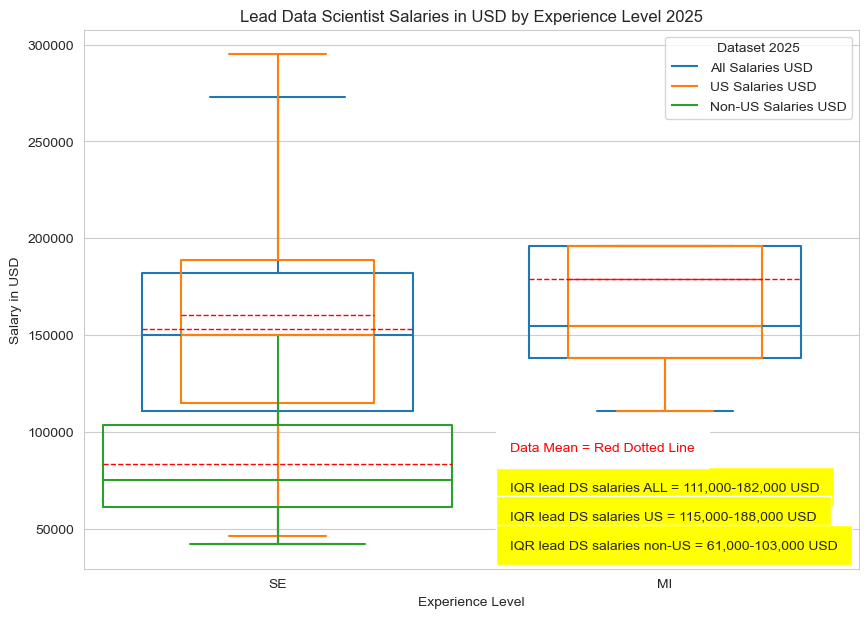

In [14]:
# Create a boxplot representing the salary_in_usd for the filtered data by experience level
# Create 3 plots, showing subsets created above, superimposed for comparison
# Remove outliers to reduce boxplot to a more managable size

sns.set_style("whitegrid")
plt.figure(figsize=(10,7))
sns.boxplot(proj1_2025_lead,x='experience_level',y="salary_in_usd", orient="v",showfliers=False,fill=False, width=.7, showmeans=True, meanline=True, meanprops={"linewidth": 1, "color": "red"},label='All Salaries USD').set(title="Lead Data Scientist Salaries in USD by Experience Level 2025")
sns.boxplot(proj1_2025_lead_US,x='experience_level',y="salary_in_usd", orient="v",showfliers=False,fill=False, showmeans=True, meanline=True, meanprops={"linewidth": 1, "color": "red"}, width=.5,label='US Salaries USD').set(title="Lead Data Scientist Salaries in USD by Experience Level 2025")
sns.boxplot(proj1_2025_lead_nonUS,x='experience_level',y="salary_in_usd", orient="v",showfliers=False,fill=False, width=.9,showmeans=True, meanline=True, meanprops={"linewidth": 1, "color": "red"},label='Non-US Salaries USD').set(title="Lead Data Scientist Salaries in USD by Experience Level 2025")

#Adding Textbox
plt.text(0.6, 70000, 'IQR lead DS salaries ALL = 111,000-182,000 USD', fontsize=10, bbox={'facecolor': 'yellow', 'pad': 10, 'alpha': 1})
plt.text(0.6, 55000, 'IQR lead DS salaries US = 115,000-188,000 USD', fontsize=10, bbox={'facecolor': 'yellow', 'pad': 10, 'alpha': 1})
plt.text(0.6, 40000, 'IQR lead DS salaries non-US = 61,000-103,000 USD', fontsize=10, bbox={'facecolor': 'yellow', 'pad': 10, 'alpha': 1})
plt.text(0.6, 90000, 'Data Mean = Red Dotted Line',color='red', fontsize=10, bbox={'facecolor': 'white', 'pad': 10, 'alpha': 1})

# Set axis labels using plt.xlabel() and plt.ylabel()
plt.xlabel('Experience Level')
plt.ylabel('Salary in USD')

plt.legend(title='Dataset 2025')
plt.show()